<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LoRA块数值分析" data-toc-modified-id="LoRA块数值分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LoRA块数值分析</a></span><ul class="toc-item"><li><span><a href="#SFT" data-toc-modified-id="SFT-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>SFT</a></span></li></ul></li><li><span><a href="#基座模型数值分析" data-toc-modified-id="基座模型数值分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>基座模型数值分析</a></span><ul class="toc-item"><li><span><a href="#Qwen2.5-0.5B-Instruct" data-toc-modified-id="Qwen2.5-0.5B-Instruct-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Qwen2.5-0.5B-Instruct</a></span></li></ul></li></ul></div>

In [77]:
import os
import string
import torch
from torch import nn
from torch.nn import functional as F
if not "CHDIR_FLAG" in dir():
    os.chdir("../")
    CHDIR_FLAG = True
    
import numpy as np
import pandas as pd
from safetensors import safe_open
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM


from src.tools.plot import plot_tensor_histogram, plot_tensor_heatmap
from src.tools.torch import register_forward_hook_decorator, register_backward_hook_decorator

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# LoRA块数值分析

## SFT

torch.Size([16, 896]) torch.Size([128, 16])


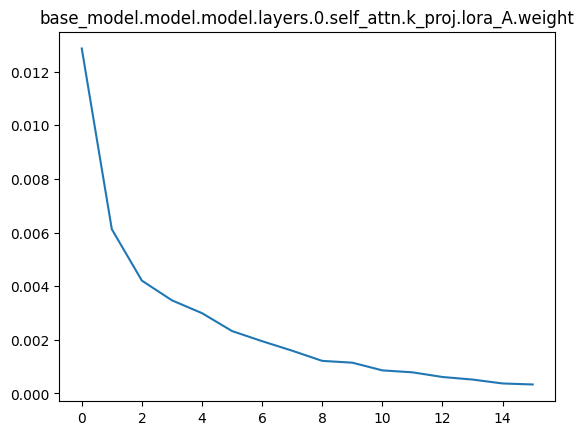

torch.Size([16, 896]) torch.Size([896, 16])


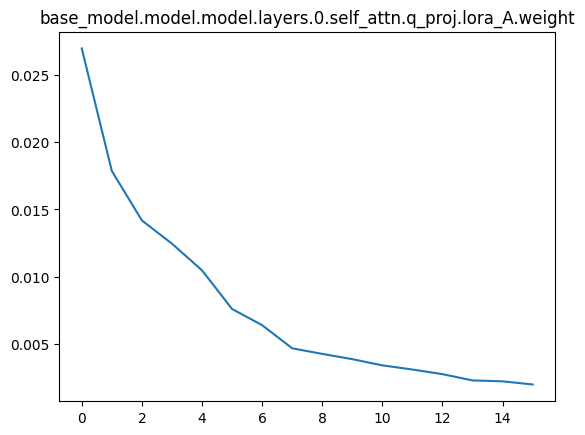

torch.Size([16, 896]) torch.Size([128, 16])


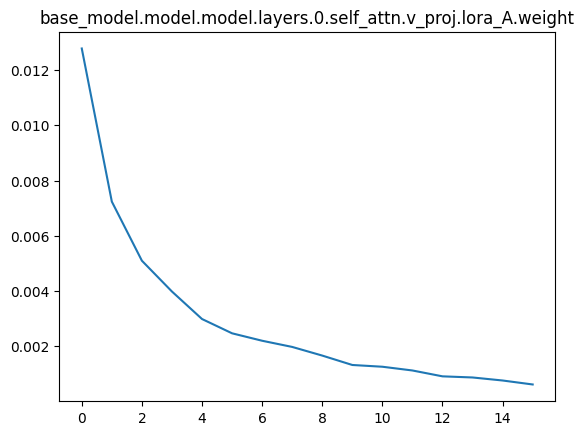

torch.Size([16, 896]) torch.Size([128, 16])


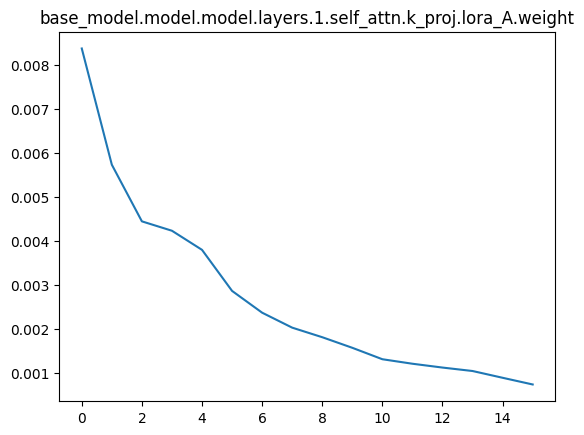

torch.Size([16, 896]) torch.Size([896, 16])


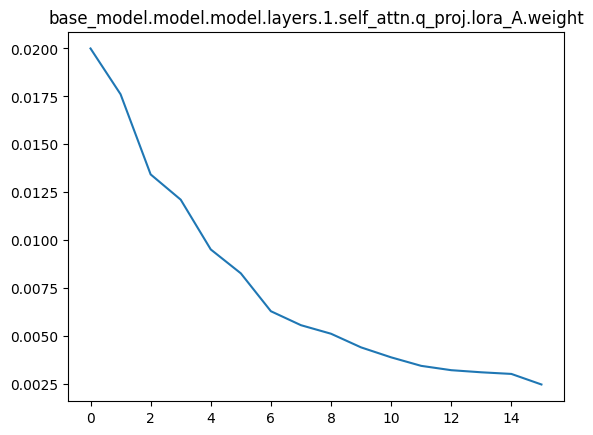

torch.Size([16, 896]) torch.Size([128, 16])


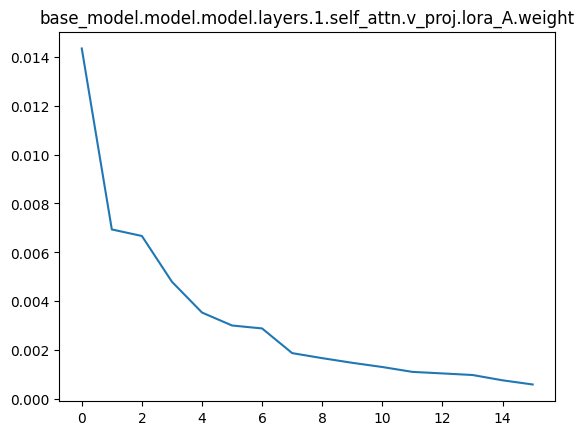

torch.Size([16, 896]) torch.Size([128, 16])


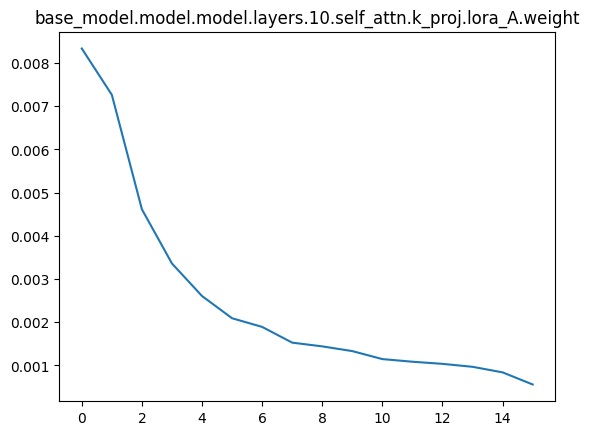

torch.Size([16, 896]) torch.Size([896, 16])


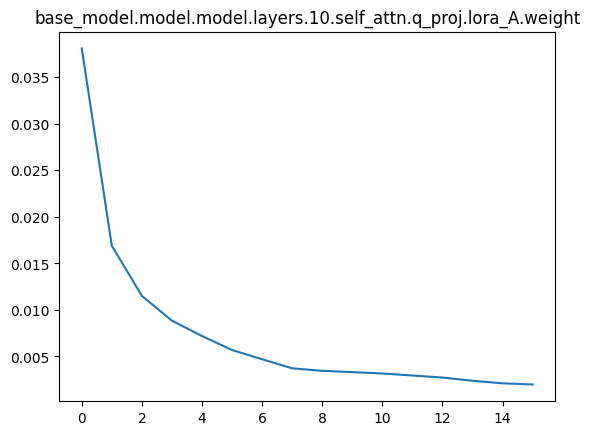

torch.Size([16, 896]) torch.Size([128, 16])


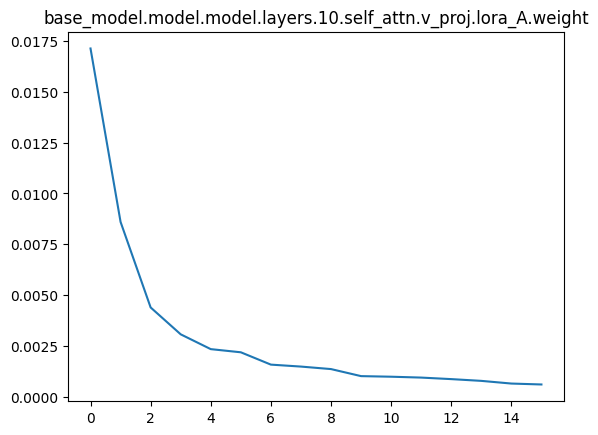

torch.Size([16, 896]) torch.Size([128, 16])


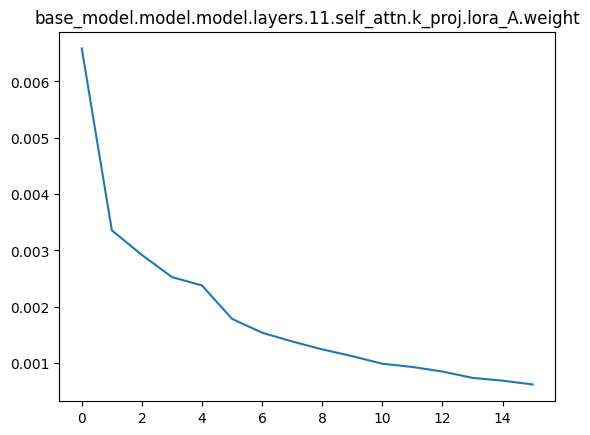

torch.Size([16, 896]) torch.Size([896, 16])


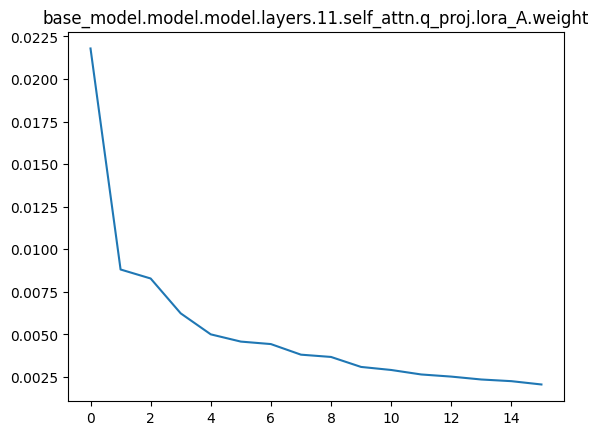

torch.Size([16, 896]) torch.Size([128, 16])


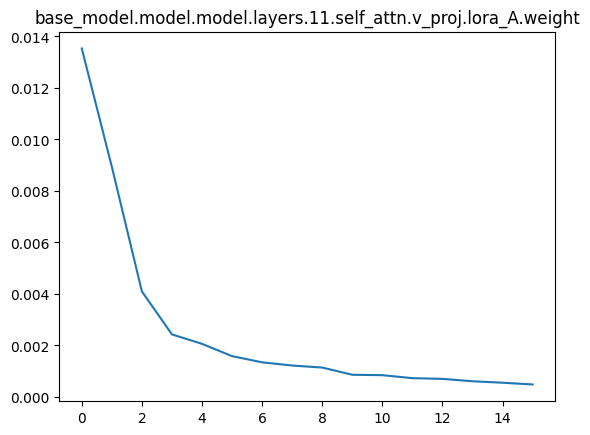

torch.Size([16, 896]) torch.Size([128, 16])


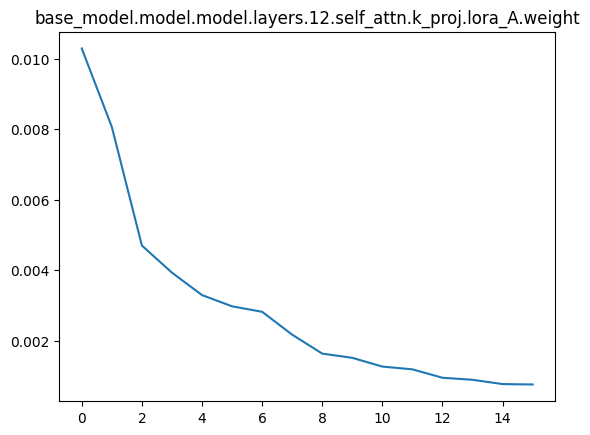

torch.Size([16, 896]) torch.Size([896, 16])


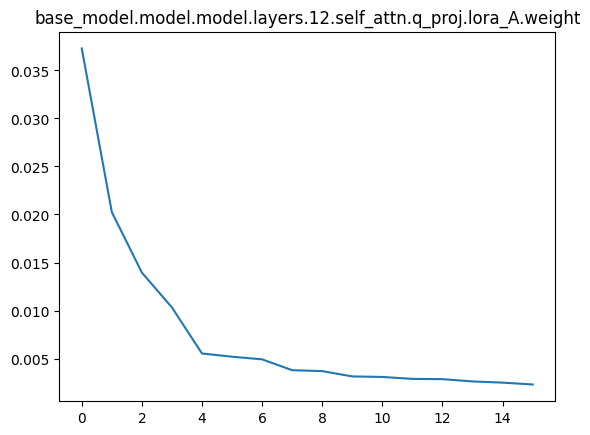

torch.Size([16, 896]) torch.Size([128, 16])


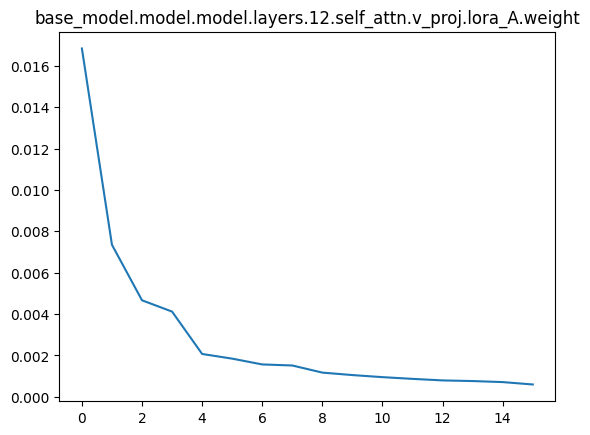

torch.Size([16, 896]) torch.Size([128, 16])


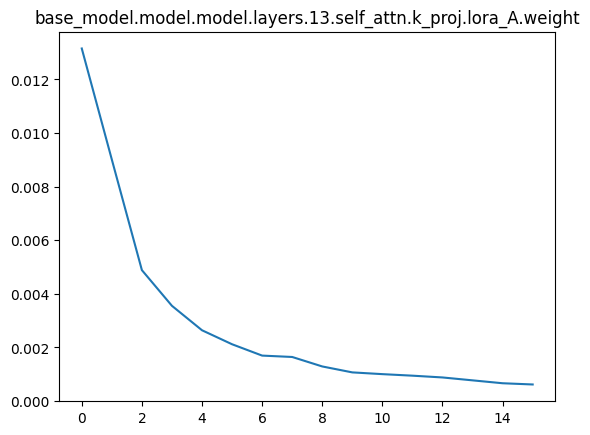

torch.Size([16, 896]) torch.Size([896, 16])


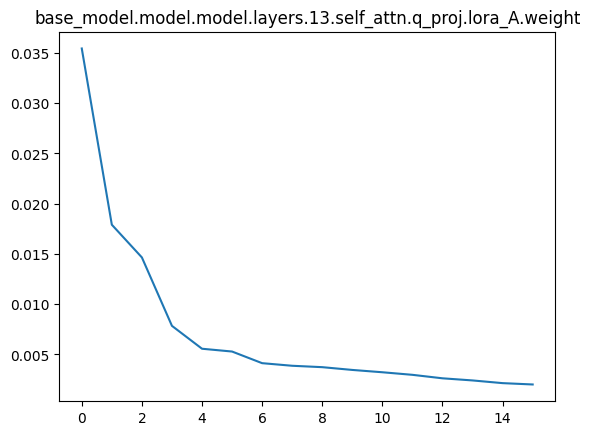

torch.Size([16, 896]) torch.Size([128, 16])


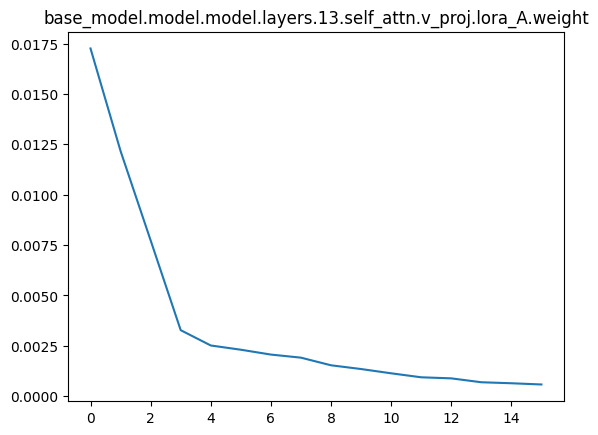

torch.Size([16, 896]) torch.Size([128, 16])


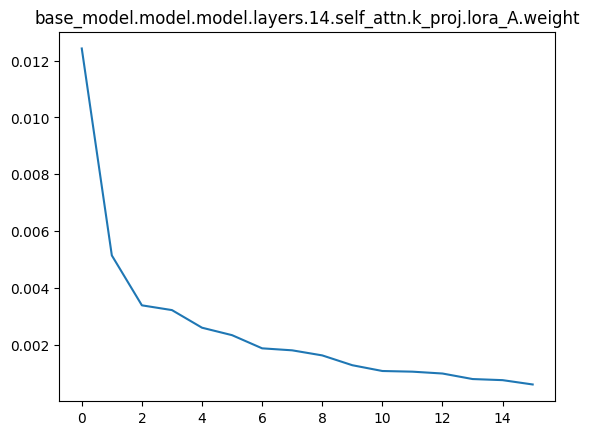

torch.Size([16, 896]) torch.Size([896, 16])


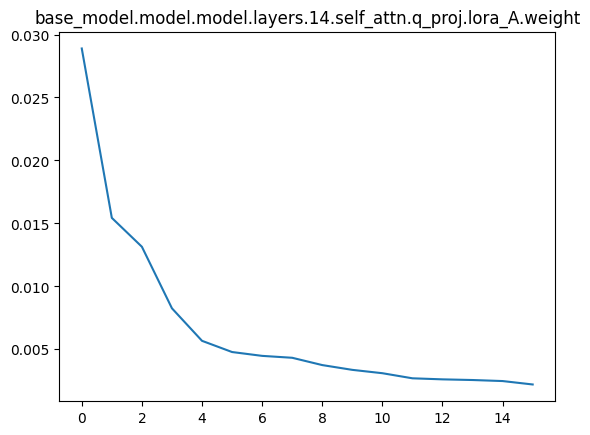

torch.Size([16, 896]) torch.Size([128, 16])


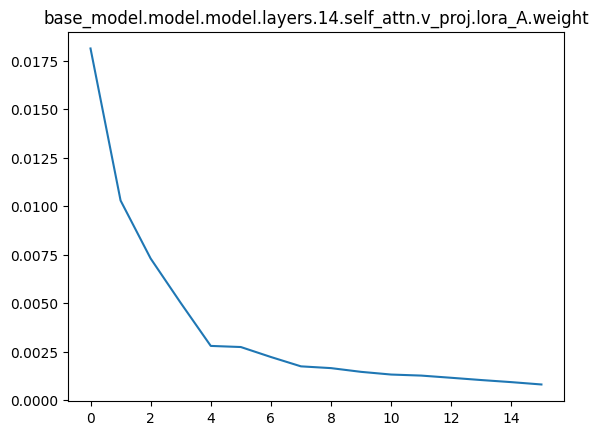

torch.Size([16, 896]) torch.Size([128, 16])


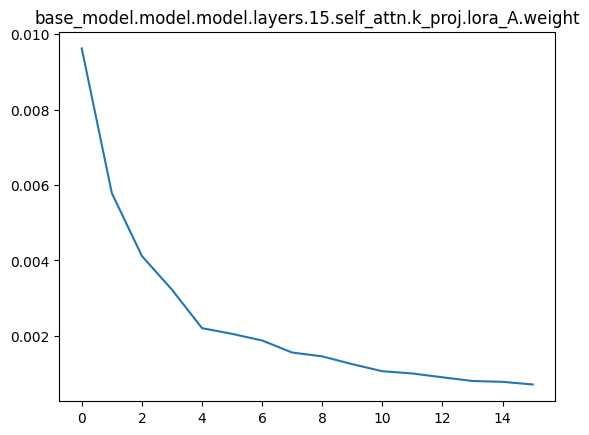

torch.Size([16, 896]) torch.Size([896, 16])


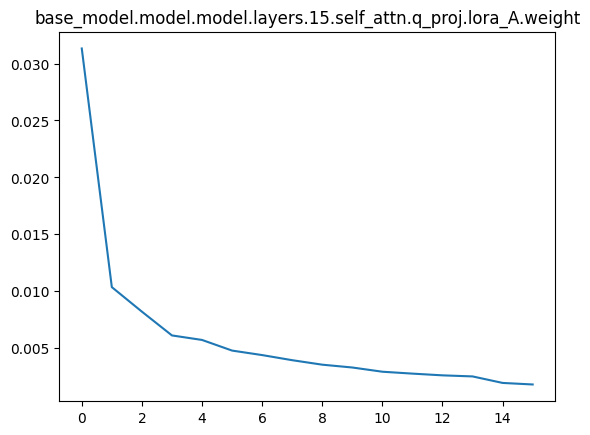

torch.Size([16, 896]) torch.Size([128, 16])


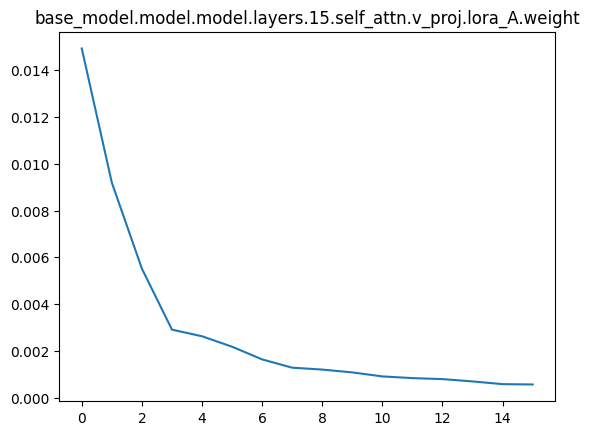

torch.Size([16, 896]) torch.Size([128, 16])


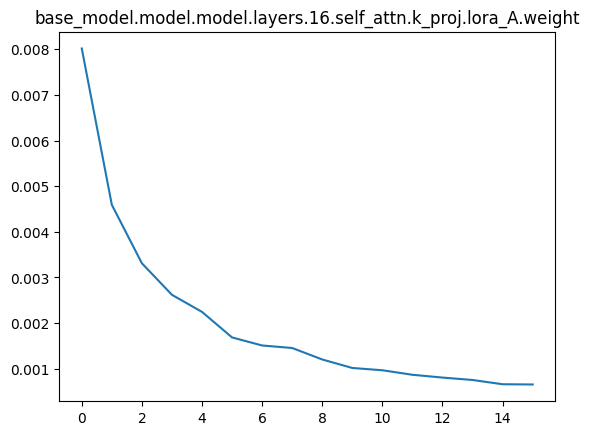

torch.Size([16, 896]) torch.Size([896, 16])


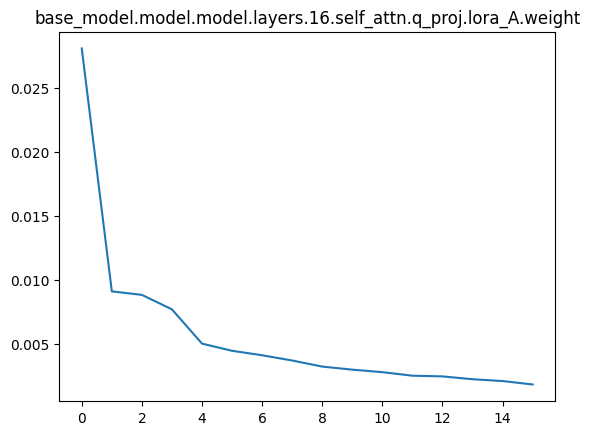

torch.Size([16, 896]) torch.Size([128, 16])


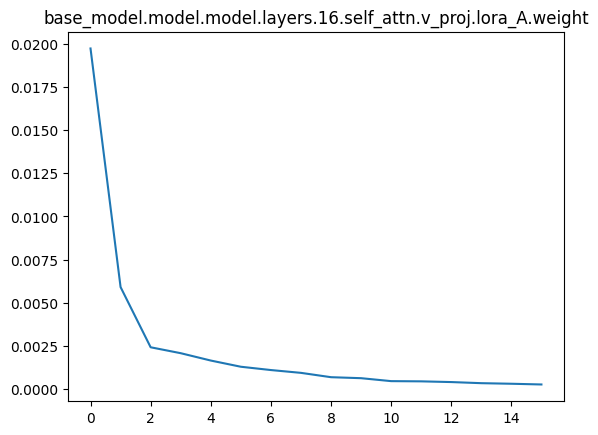

torch.Size([16, 896]) torch.Size([128, 16])


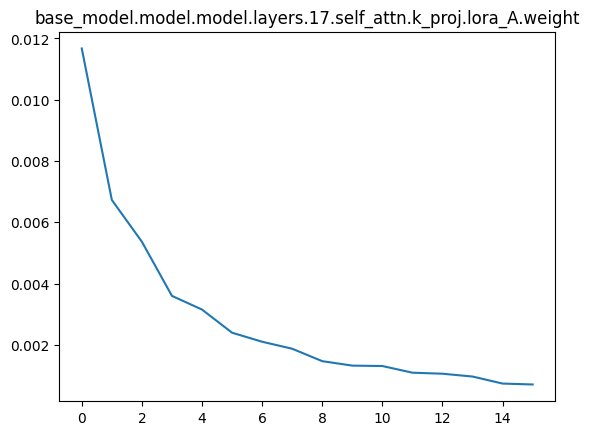

torch.Size([16, 896]) torch.Size([896, 16])


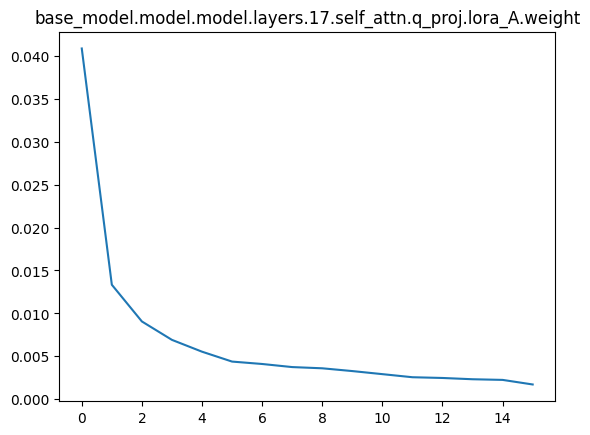

torch.Size([16, 896]) torch.Size([128, 16])


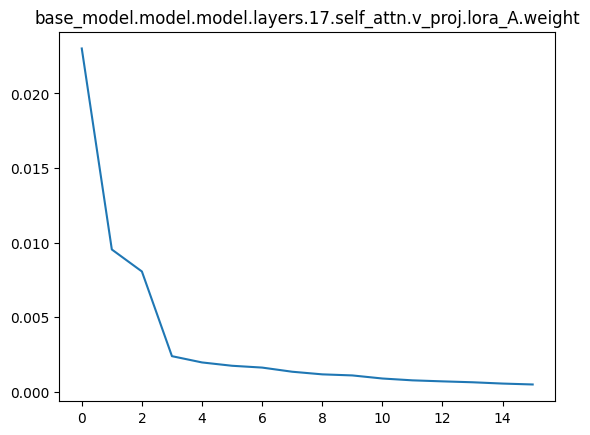

torch.Size([16, 896]) torch.Size([128, 16])


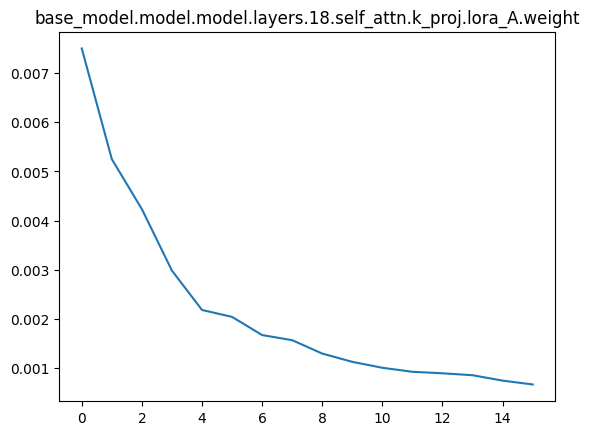

torch.Size([16, 896]) torch.Size([896, 16])


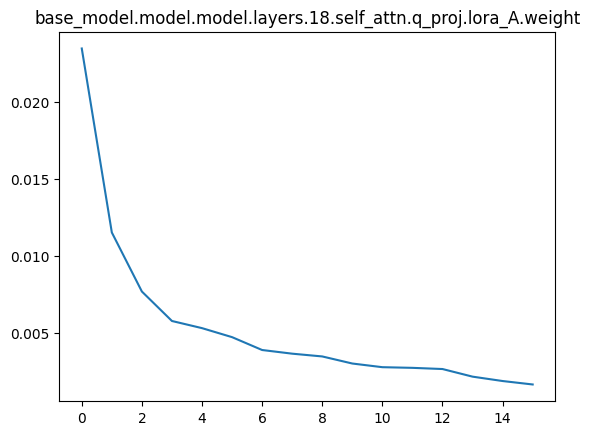

torch.Size([16, 896]) torch.Size([128, 16])


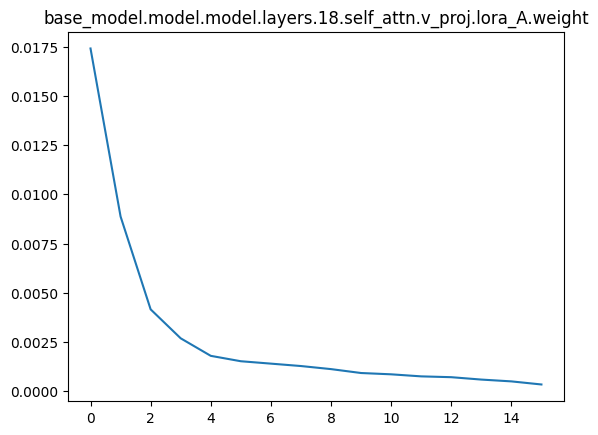

torch.Size([16, 896]) torch.Size([128, 16])


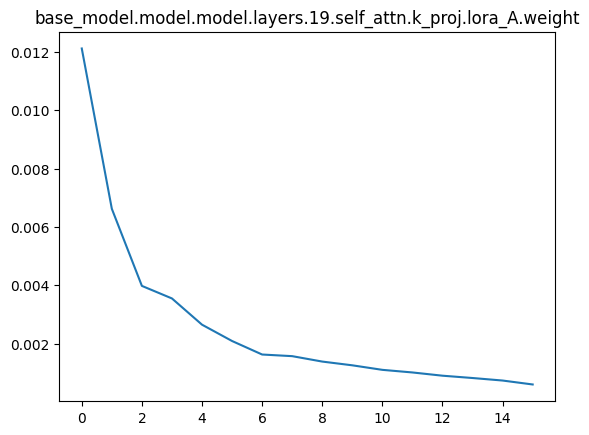

torch.Size([16, 896]) torch.Size([896, 16])


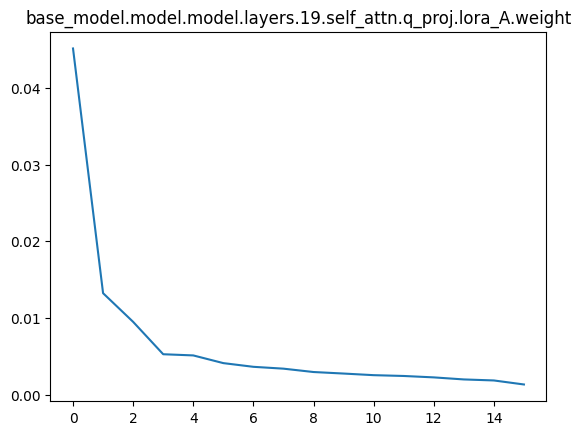

torch.Size([16, 896]) torch.Size([128, 16])


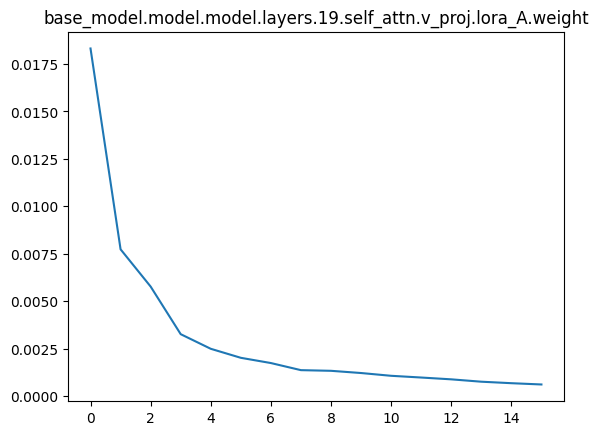

torch.Size([16, 896]) torch.Size([128, 16])


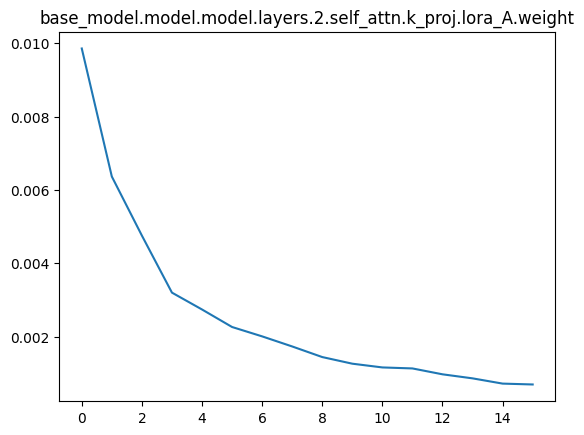

torch.Size([16, 896]) torch.Size([896, 16])


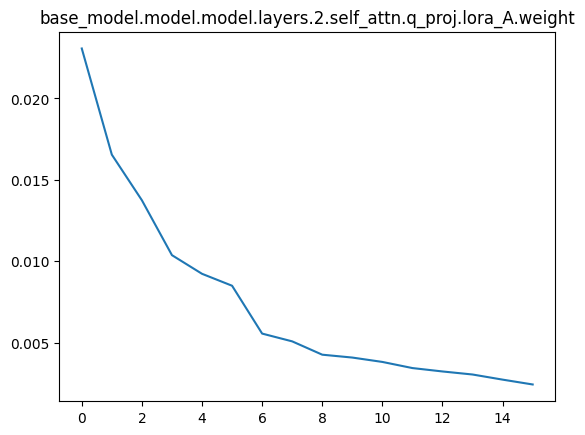

torch.Size([16, 896]) torch.Size([128, 16])


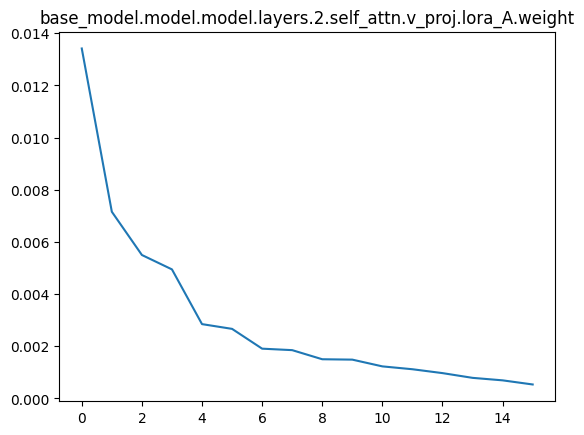

torch.Size([16, 896]) torch.Size([128, 16])


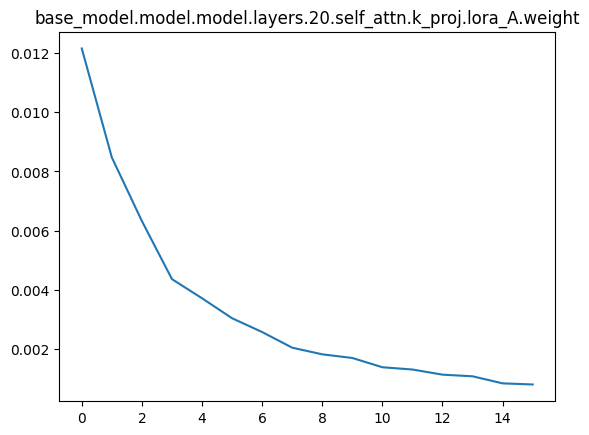

torch.Size([16, 896]) torch.Size([896, 16])


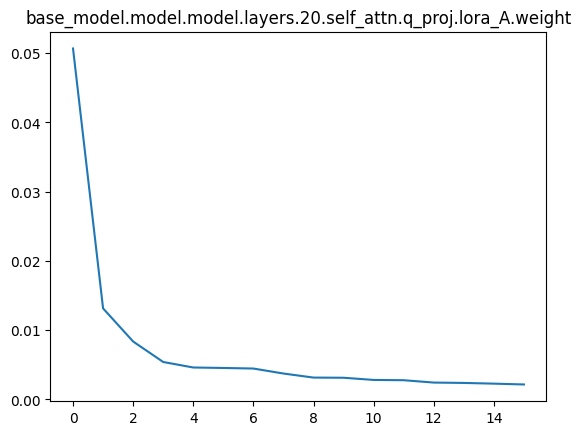

torch.Size([16, 896]) torch.Size([128, 16])


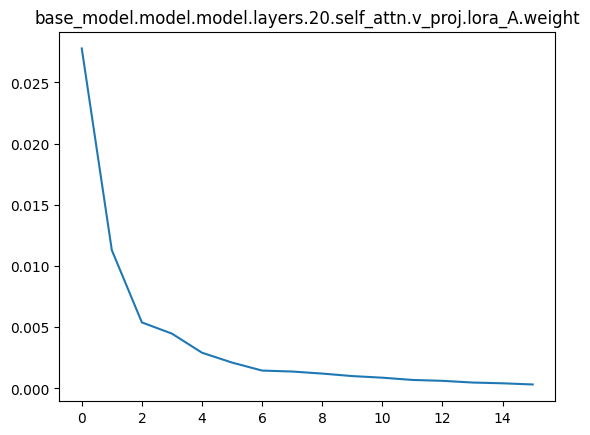

torch.Size([16, 896]) torch.Size([128, 16])


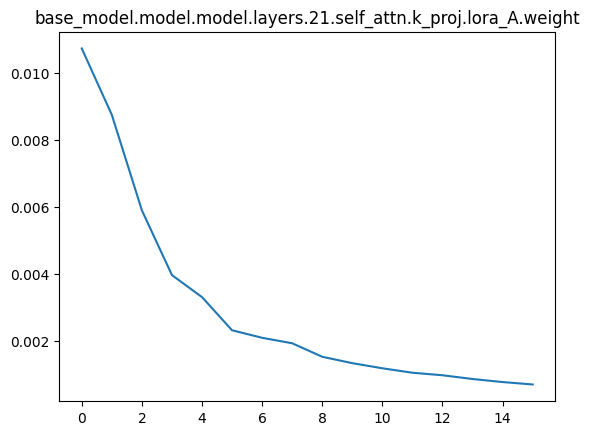

torch.Size([16, 896]) torch.Size([896, 16])


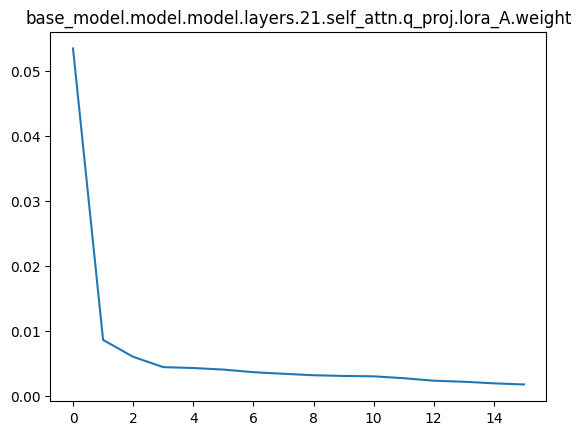

torch.Size([16, 896]) torch.Size([128, 16])


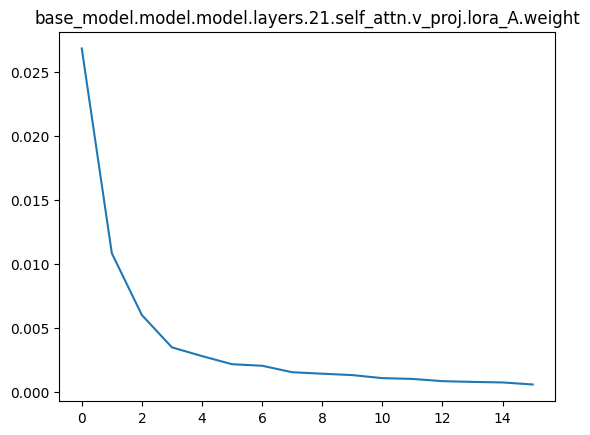

torch.Size([16, 896]) torch.Size([128, 16])


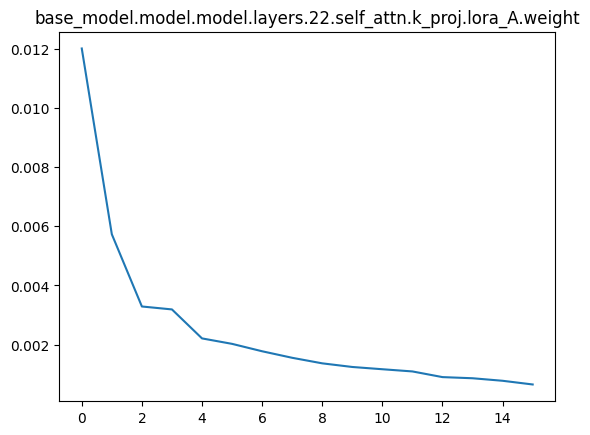

torch.Size([16, 896]) torch.Size([896, 16])


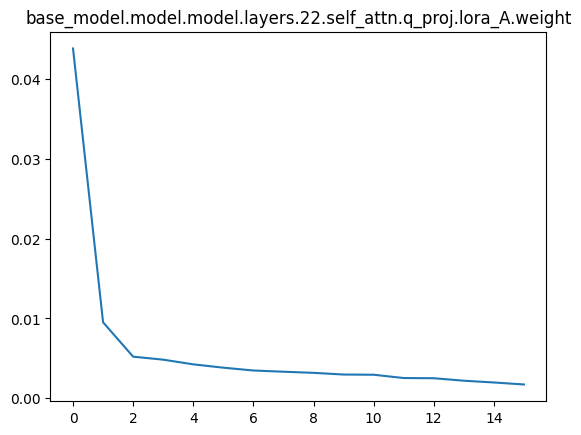

torch.Size([16, 896]) torch.Size([128, 16])


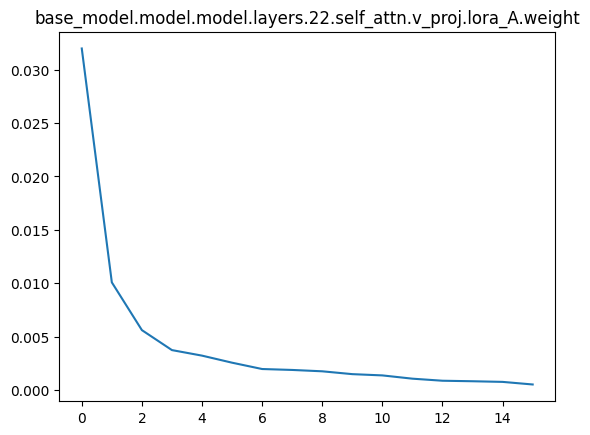

torch.Size([16, 896]) torch.Size([128, 16])


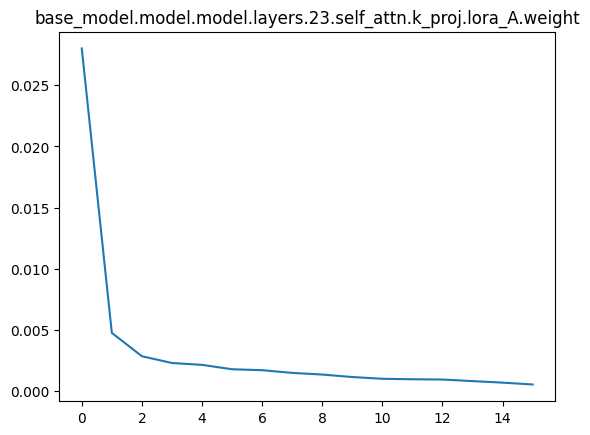

torch.Size([16, 896]) torch.Size([896, 16])


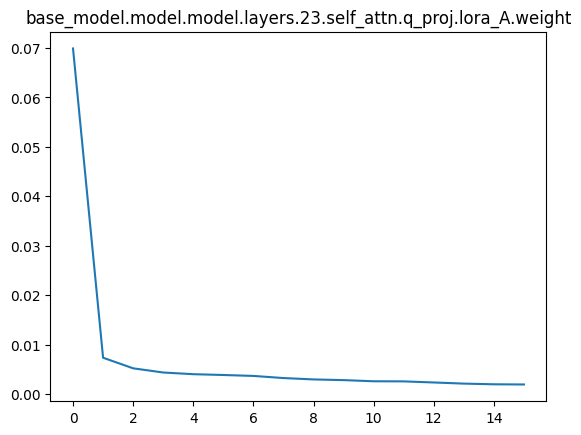

torch.Size([16, 896]) torch.Size([128, 16])


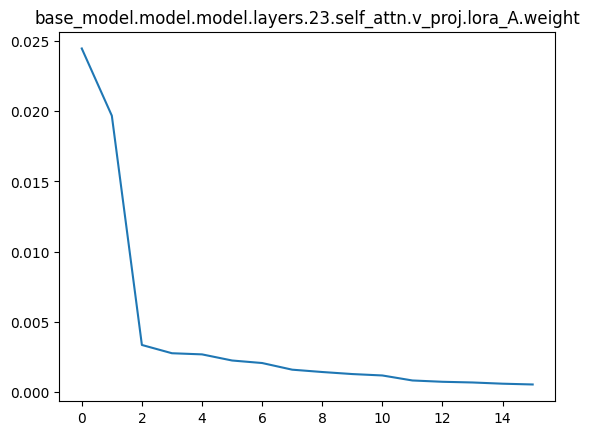

torch.Size([16, 896]) torch.Size([128, 16])


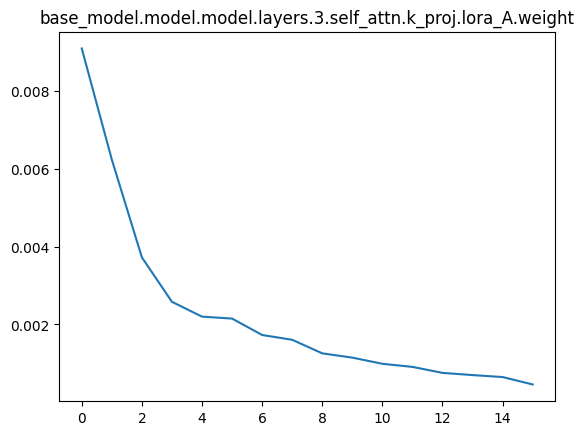

torch.Size([16, 896]) torch.Size([896, 16])


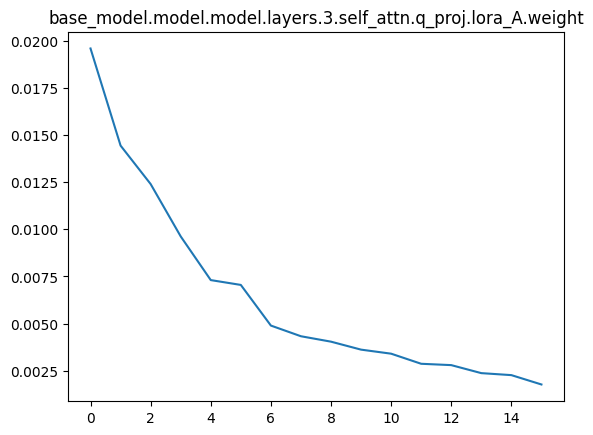

torch.Size([16, 896]) torch.Size([128, 16])


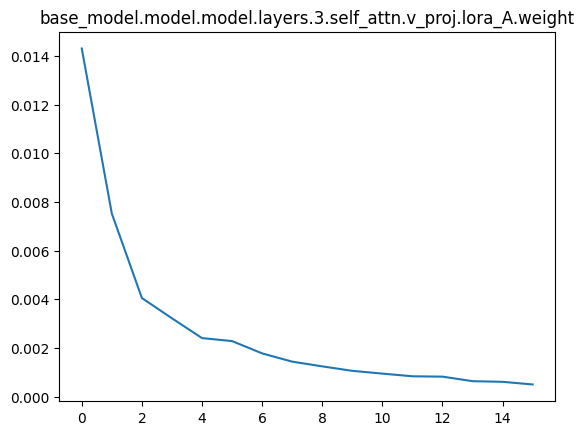

torch.Size([16, 896]) torch.Size([128, 16])


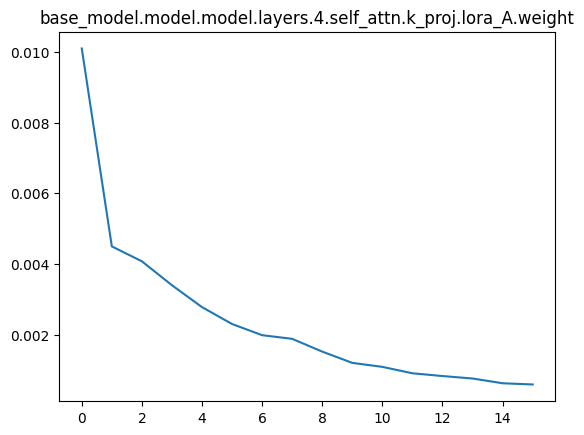

torch.Size([16, 896]) torch.Size([896, 16])


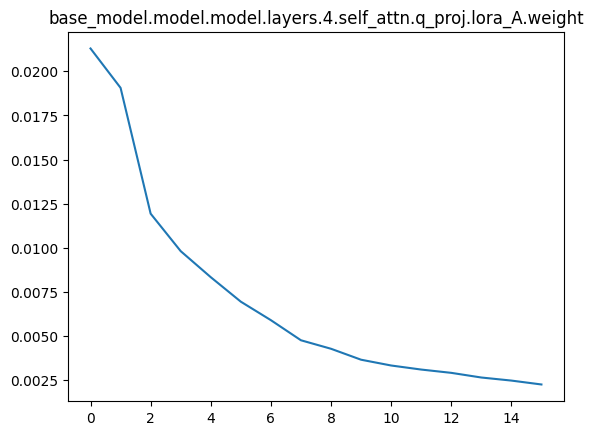

torch.Size([16, 896]) torch.Size([128, 16])


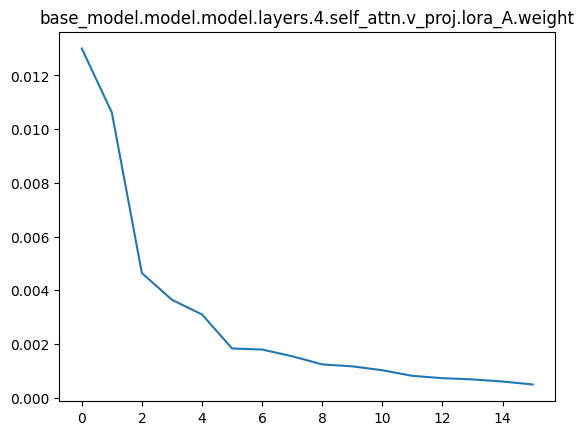

torch.Size([16, 896]) torch.Size([128, 16])


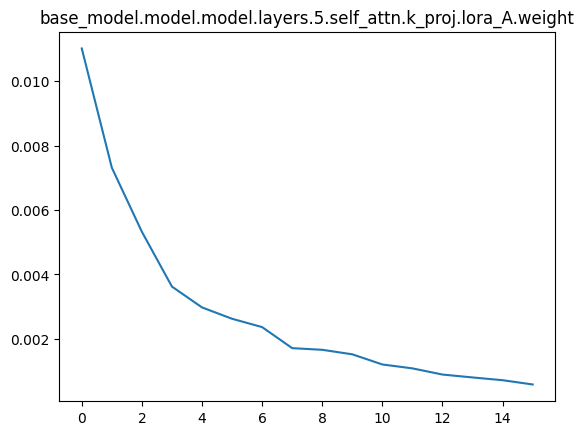

torch.Size([16, 896]) torch.Size([896, 16])


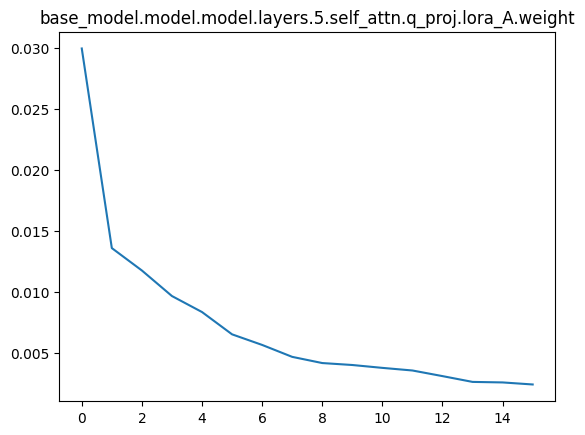

torch.Size([16, 896]) torch.Size([128, 16])


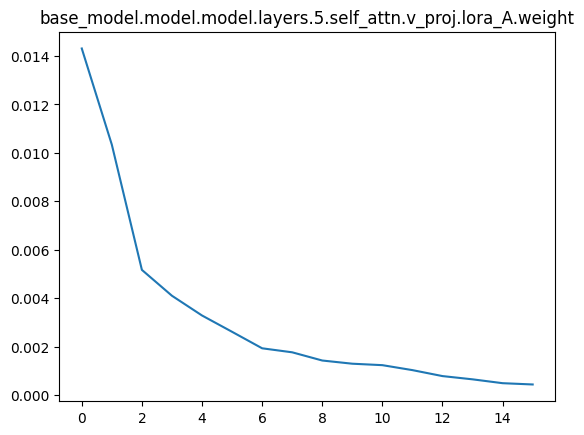

torch.Size([16, 896]) torch.Size([128, 16])


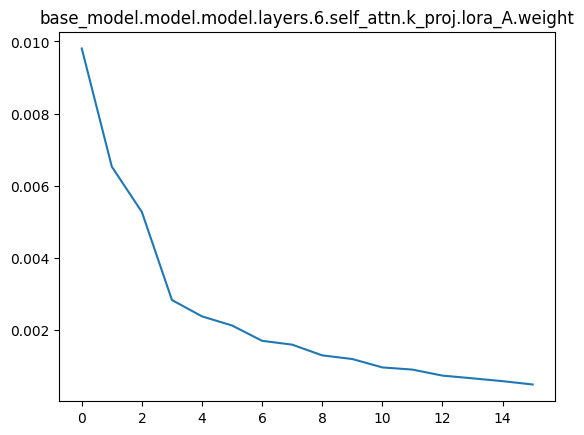

torch.Size([16, 896]) torch.Size([896, 16])


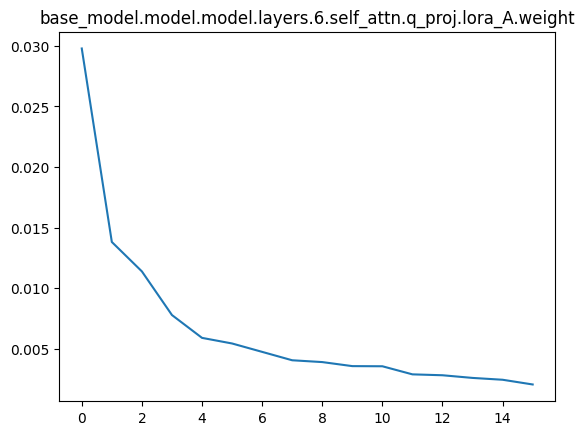

torch.Size([16, 896]) torch.Size([128, 16])


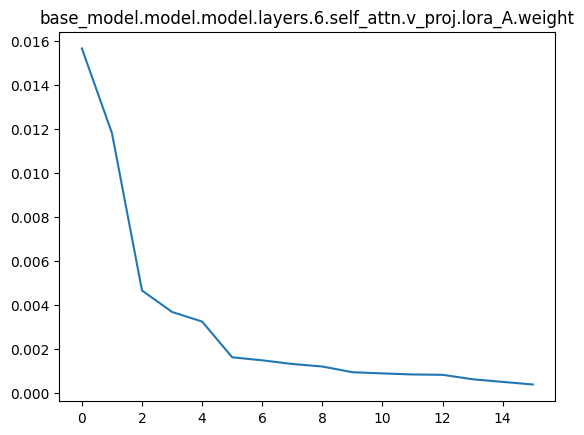

torch.Size([16, 896]) torch.Size([128, 16])


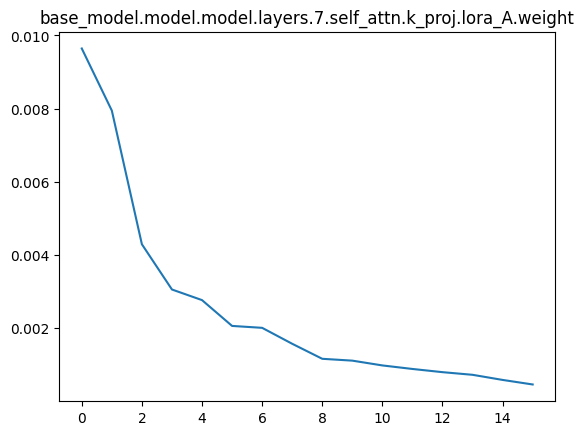

torch.Size([16, 896]) torch.Size([896, 16])


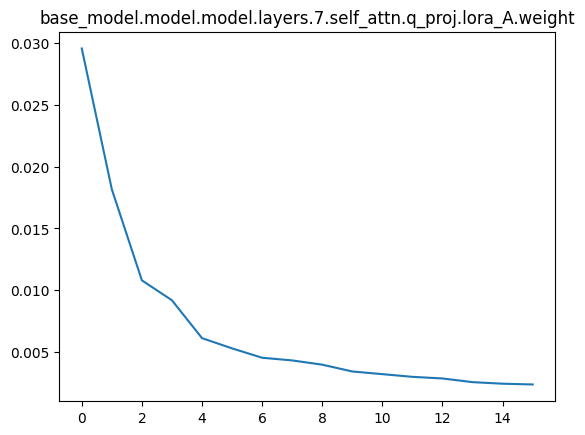

torch.Size([16, 896]) torch.Size([128, 16])


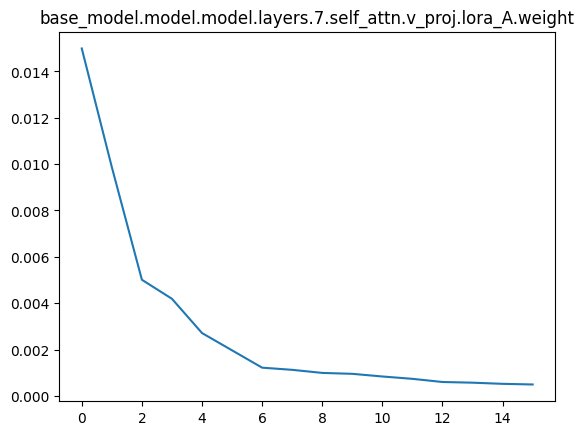

torch.Size([16, 896]) torch.Size([128, 16])


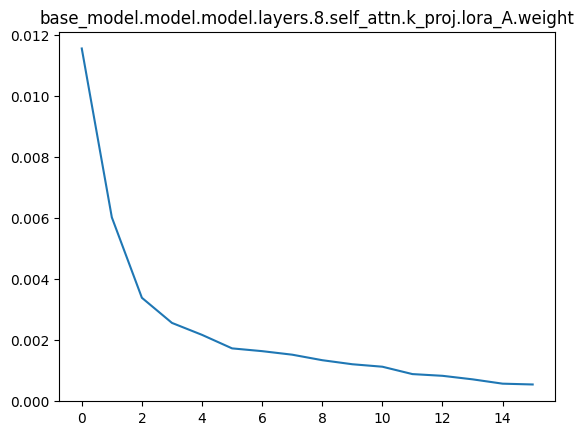

torch.Size([16, 896]) torch.Size([896, 16])


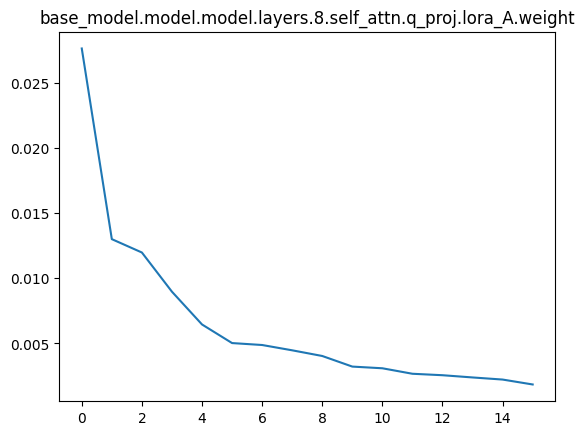

torch.Size([16, 896]) torch.Size([128, 16])


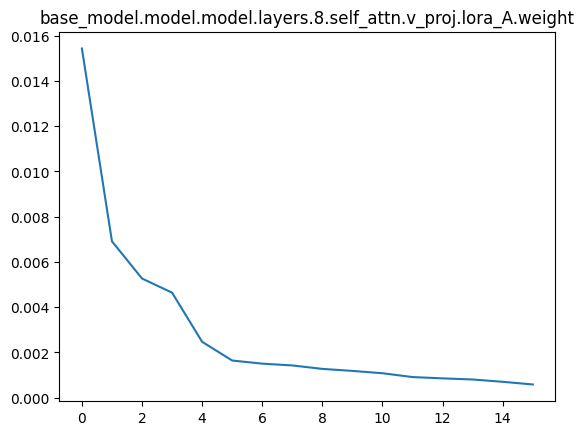

torch.Size([16, 896]) torch.Size([128, 16])


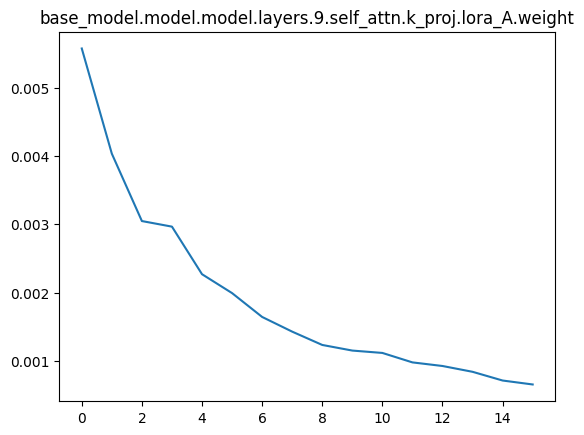

torch.Size([16, 896]) torch.Size([896, 16])


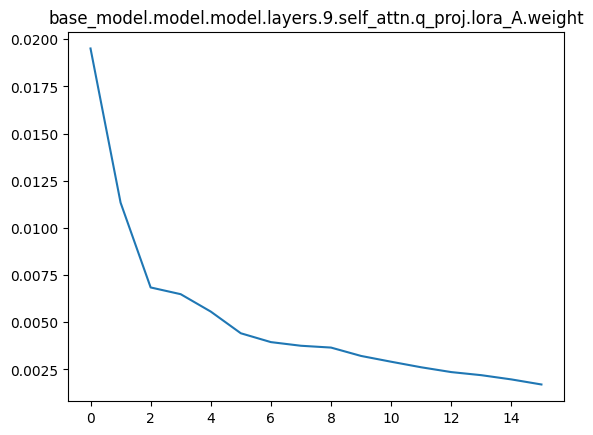

torch.Size([16, 896]) torch.Size([128, 16])


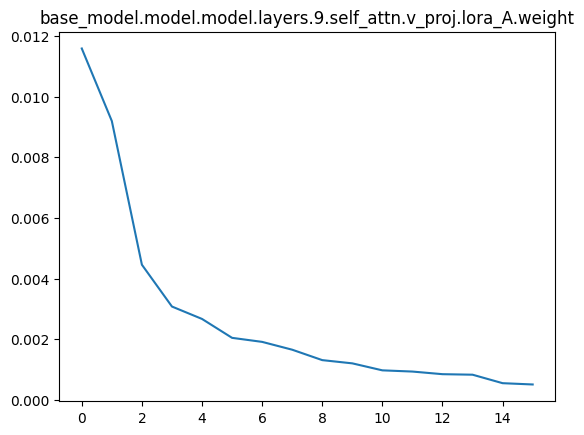

In [2]:
output_dir = "./temp/sft+Qwen2.5-0.5B-Instruct+tldr"
# output_dir = "./results/sft+Qwen2.5-0.5B-Instruct+firefly-train-1.1M"

adapter_path = os.path.join(output_dir, "adapter_model.safetensors")

with safe_open(adapter_path, framework="pt", device="cpu") as f:
    keys = f.keys()
    for key_A, key_B in zip(keys[:-1][::2], keys[1:][::2]):
        lora_A, lora_B = f.get_tensor(key_A), f.get_tensor(key_B)
        print(lora_A.size(), lora_B.size())
        BA = lora_B @ lora_A
        U, S, V = torch.svd(BA)
        plt.plot(S[:16])
        plt.title(key_A)
        plt.show()
        plt.close()   

<font color=blue>没有明显出现之前的$v$的LoRA块明显低秩的情况</font>

# 基座模型数值分析

In [3]:
model_home = r"D:\resource\model\huggingface"
model_names = [
    r"Qwen\Qwen2.5-0.5B-Instruct",
    r"deepseek-ai\DeepSeek-R1-Distill-Qwen-1.5B",
]

## Qwen2.5-0.5B-Instruct

In [64]:
model = AutoModelForCausalLM.from_pretrained(os.path.join(model_home, model_names[0]))

In [76]:
model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=896, out_features=896, bias=True)
          (k_proj): Linear(in_features=896, out_features=128, bias=True)
          (v_proj): Linear(in_features=896, out_features=128, bias=True)
          (o_proj): Linear(in_features=896, out_features=896, bias=False)
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
          (up_proj): Linear(in_features=896, out_features=4864, bias=False)
          (down_proj): Linear(in_features=4864, out_features=896, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((896,), eps=1e-06)
    (rotary_emb): Qwen2RotaryEmbe

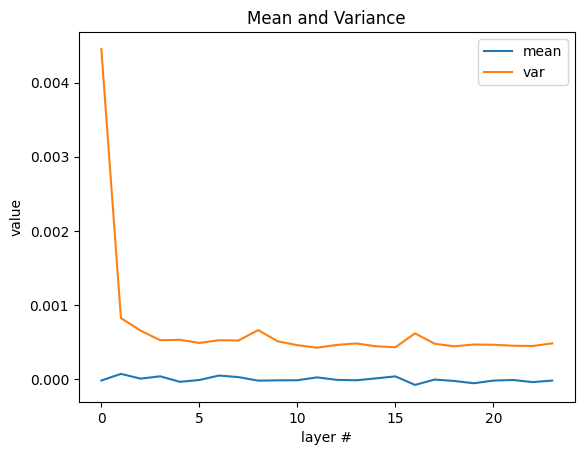

In [78]:
means = []
variances = []

for i in range(24):
    tensor = model.model.layers[i].self_attn.q_proj.weight.detach()
    # plot_tensor_histogram(tensor, figsize=(5, 5))
    means.append(tensor.mean().item())
    variances.append(tensor.var().item())
    

x = list(range(len(means)))
plt.plot(x, means, label="mean")
plt.plot(x, variances, label="var")
plt.legend()
plt.xlabel("layer #")
plt.ylabel("value")
plt.title("Mean and Variance")
plt.show()
plt.close()



Qwen2.5-0.5B-Instuct随module层的推进：


- `q_proj` `k_proj` `v_proj` 三个投射矩阵的数值分布基本呈现均值为零的正态分布
- `q_proj`和`k_proj`的方差呈现递减的态势，尤其是第0和第1层的方差显著高于后面的层
- `v_proj`的方差则呈现上升态势
- 在DeepSeek-R1-Distill-Qwen-1.5B上呈现的性状是一致的

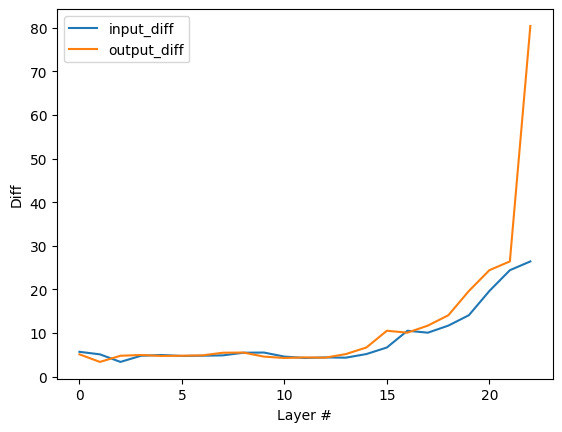

In [79]:
hook_data_path = r"./results/strawberry-X-4/fhook+Qwen2.5-0.5B-Instruct+True-0.pt"
hook_data_path = r"./results/longlong-1/fhook+Qwen2.5-0.5B-Instruct+True-0.pt"
hook_data = torch.load(hook_data_path)
layer_id = 1
n_layers = 24
module_name_formatter = "model.layers[{}]"
input_diffs, output_diffs = [], []
x = list(range(n_layers - 1))
for i in range(n_layers - 1):
    input_1 = hook_data[layer_id][module_name_formatter.format(i)]["input"][0][0]
    input_2 = hook_data[layer_id][module_name_formatter.format(i + 1)]["input"][0][0]
    output_1 = hook_data[layer_id][module_name_formatter.format(i)]["output"][0][0]
    output_2 = hook_data[layer_id][module_name_formatter.format(i + 1)]["output"][0][0]
    input_diff = torch.norm(input_1 - input_2, p="fro").item()
    output_diff = torch.norm(output_1 - output_2, p="fro").item()
    input_diffs.append(input_diff)
    output_diffs.append(output_diff)
    
plt.plot(x, input_diffs, label="input_diff")
plt.plot(x, output_diffs, label="output_diff")
plt.legend(), plt.xlabel("Layer #"), plt.ylabel("Diff")
plt.show()
plt.close()

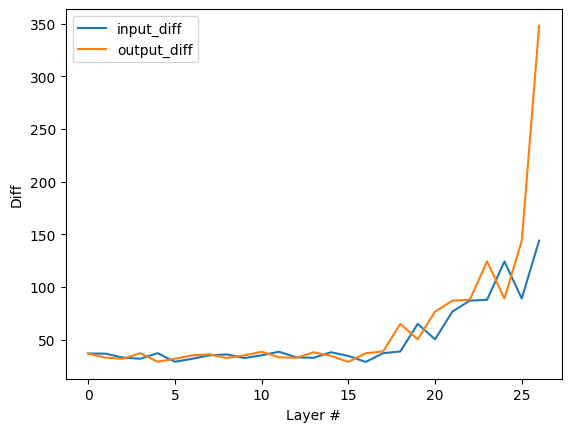

In [73]:
hook_data_path = r"./results/strawberry-X-3/fhook+DeepSeek-R1-Distill-Qwen-1.5B+True-0.pt"
hook_data = torch.load(hook_data_path)
layer_id = 3
n_layers = 28
module_name_formatter = "model.layers[{}]"
input_diffs, output_diffs = [], []
x = list(range(n_layers - 1))
for i in range(n_layers - 1):
    input_1 = hook_data[layer_id][module_name_formatter.format(i)]["input"][0][0]
    input_2 = hook_data[layer_id][module_name_formatter.format(i + 1)]["input"][0][0]
    output_1 = hook_data[layer_id][module_name_formatter.format(i)]["output"][0][0]
    output_2 = hook_data[layer_id][module_name_formatter.format(i + 1)]["output"][0][0]
    input_diff = torch.norm(input_1 - input_2, p="fro").item()
    output_diff = torch.norm(output_1 - output_2, p="fro").item()
    input_diffs.append(input_diff)
    output_diffs.append(output_diff)
    
plt.plot(x, input_diffs, label="input_diff")
plt.plot(x, output_diffs, label="output_diff")
plt.legend(), plt.xlabel("Layer #"), plt.ylabel("Diff")
plt.show()
plt.close()

<font color=red>层与层之间输入输出的diff基本上也是符合递增的规律的</font>

- 这里展示的边际的输出差异（即相邻层的输出差异）

- 最后一层发生突变，这在Qwen2.5-0.5B-Instruct和DeeSeek上都是一样的，而且生成每一个token都表现出这种性状
- <font color=red>更换不同的prompt后，这种情况始终存在，这是个很重要的实证结论</font>